# Pràctica 3: Regressió Logistica


## Avaluació i entregues

### Entregues
Les pràctiques es realitzarán els divendres de 15:00 a 17:00. Cada setmana presentarem nous mètodes i algorismes vistos a la classe de teoria.

L'entrega, es realitzarà el següent dijous abans de les 23:59, és a dir, tindreu les hores de classe més tota una setmana per a realitzar les tasques. Es pujará un .ipynb ja executat, on no només hi hagi codi sinó també text explicatiu de gràfiques, resultats, i analisis. Tingueu en compte que no es valora tant la quantitat, sino la qualitat del que s'hi explica. Hem d'aprendre a extreure el gra de la palla i presentar-ho de forma correcta i concisa.


### Avaluació
Aquesta práctica será molt més dirigida que l'anterior. S'evaluarán els següents conceptes sobre una mateixa base de dades, que tractarà sobre els vins:

* A. Ús LogisticRegression (20%)
* B. Regularitzadors (40%)
* C. Demostració Error de Variance (20%)
* D. Demostració Error de Bias (20%)

A continuació veurem un exemple de regressió lineal, i com es comporta el regressor logistic.

In [11]:
import warnings
warnings.filterwarnings('ignore')

(-3.0, 3.0)

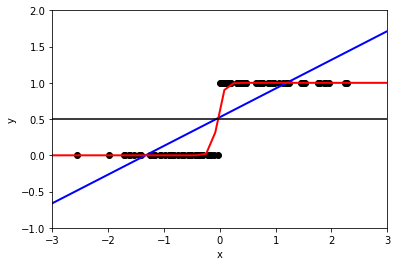

In [1]:
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
 

def lr_model(x):
    return 1 / (1 + np.exp(-x))

xmin, xmax = -10, 10
np.random.seed(0)
X = np.random.normal(size = 100) 

y = (X > 0).astype(np.float) 
X = X[:, np.newaxis] 
X_test = np.linspace(-4, 4, 50)

# Linear Regression:
ols = linear_model.LinearRegression()
ols.fit(X, y)
plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, color = 'blue', linewidth = 2)

# Logistic Regression:
clf = linear_model.LogisticRegression(C=1e2)
clf.fit(X, y)
loss = lr_model(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, color = 'red', linewidth = 2)


plt.axhline(0.5, color = 'black')
plt.scatter(X, y, color = 'black')

plt.ylabel('y')
plt.xlabel('x')

plt.ylim(-1, 2)
plt.xlim(-3, 3)


# Pràctica 3: Regressió Logistica


Per cert, recordeu el què significa el error de Variança i el de bias.

<img src="bias_variance.png" width=600 height=600 />

In [2]:
# Codi esquelet per la pràctica de la 3 sessió: Regressió Logistica

import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme()


# Visualitzarem només 3 decimals per mostra, i definim el num de files i columnes a mostrar
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 50)

# Funcio per a llegir dades en format csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

# Carreguem dataset d'exemple
dataset = load_dataset('winequalityN.csv')
dataset = dataset.dropna()
dataset['is_red_wine'] = (dataset["type"] == 'red').astype(int)


print("Dimensionalitat de la BBDD:", dataset.shape)


Dimensionalitat de la BBDD: (6463, 14)


A continuació veurem algunes taules i gràfiques per entendre com són les dades que tenim:

In [3]:
display(dataset)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red_wine
0,white,7.000,0.270,0.360,20.700,0.045,45.000,170.000,1.001,3.000,0.450,8.800,6,0
1,white,6.300,0.300,0.340,1.600,0.049,14.000,132.000,0.994,3.300,0.490,9.500,6,0
2,white,8.100,0.280,0.400,6.900,0.050,30.000,97.000,0.995,3.260,0.440,10.100,6,0
3,white,7.200,0.230,0.320,8.500,0.058,47.000,186.000,0.996,3.190,0.400,9.900,6,0
4,white,7.200,0.230,0.320,8.500,0.058,47.000,186.000,0.996,3.190,0.400,9.900,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,red,6.800,0.620,0.080,1.900,0.068,28.000,38.000,0.997,3.420,0.820,9.500,6,1
6492,red,6.200,0.600,0.080,2.000,0.090,32.000,44.000,0.995,3.450,0.580,10.500,5,1
6494,red,6.300,0.510,0.130,2.300,0.076,29.000,40.000,0.996,3.420,0.750,11.000,6,1
6495,red,5.900,0.645,0.120,2.000,0.075,32.000,44.000,0.995,3.570,0.710,10.200,5,1


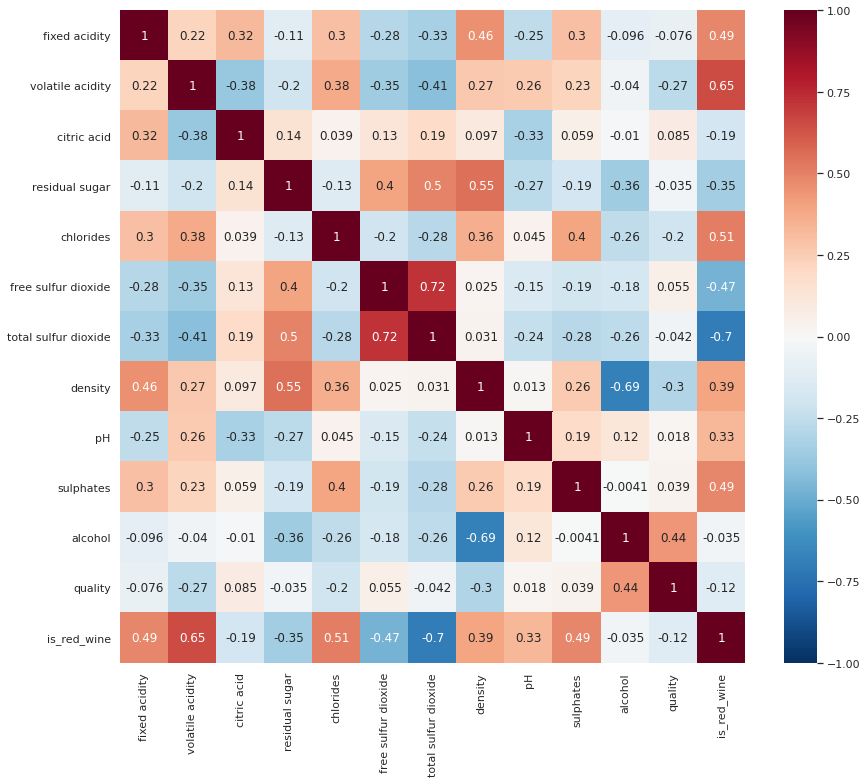

In [4]:
correlation = dataset.corr()
#display(correlation)
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

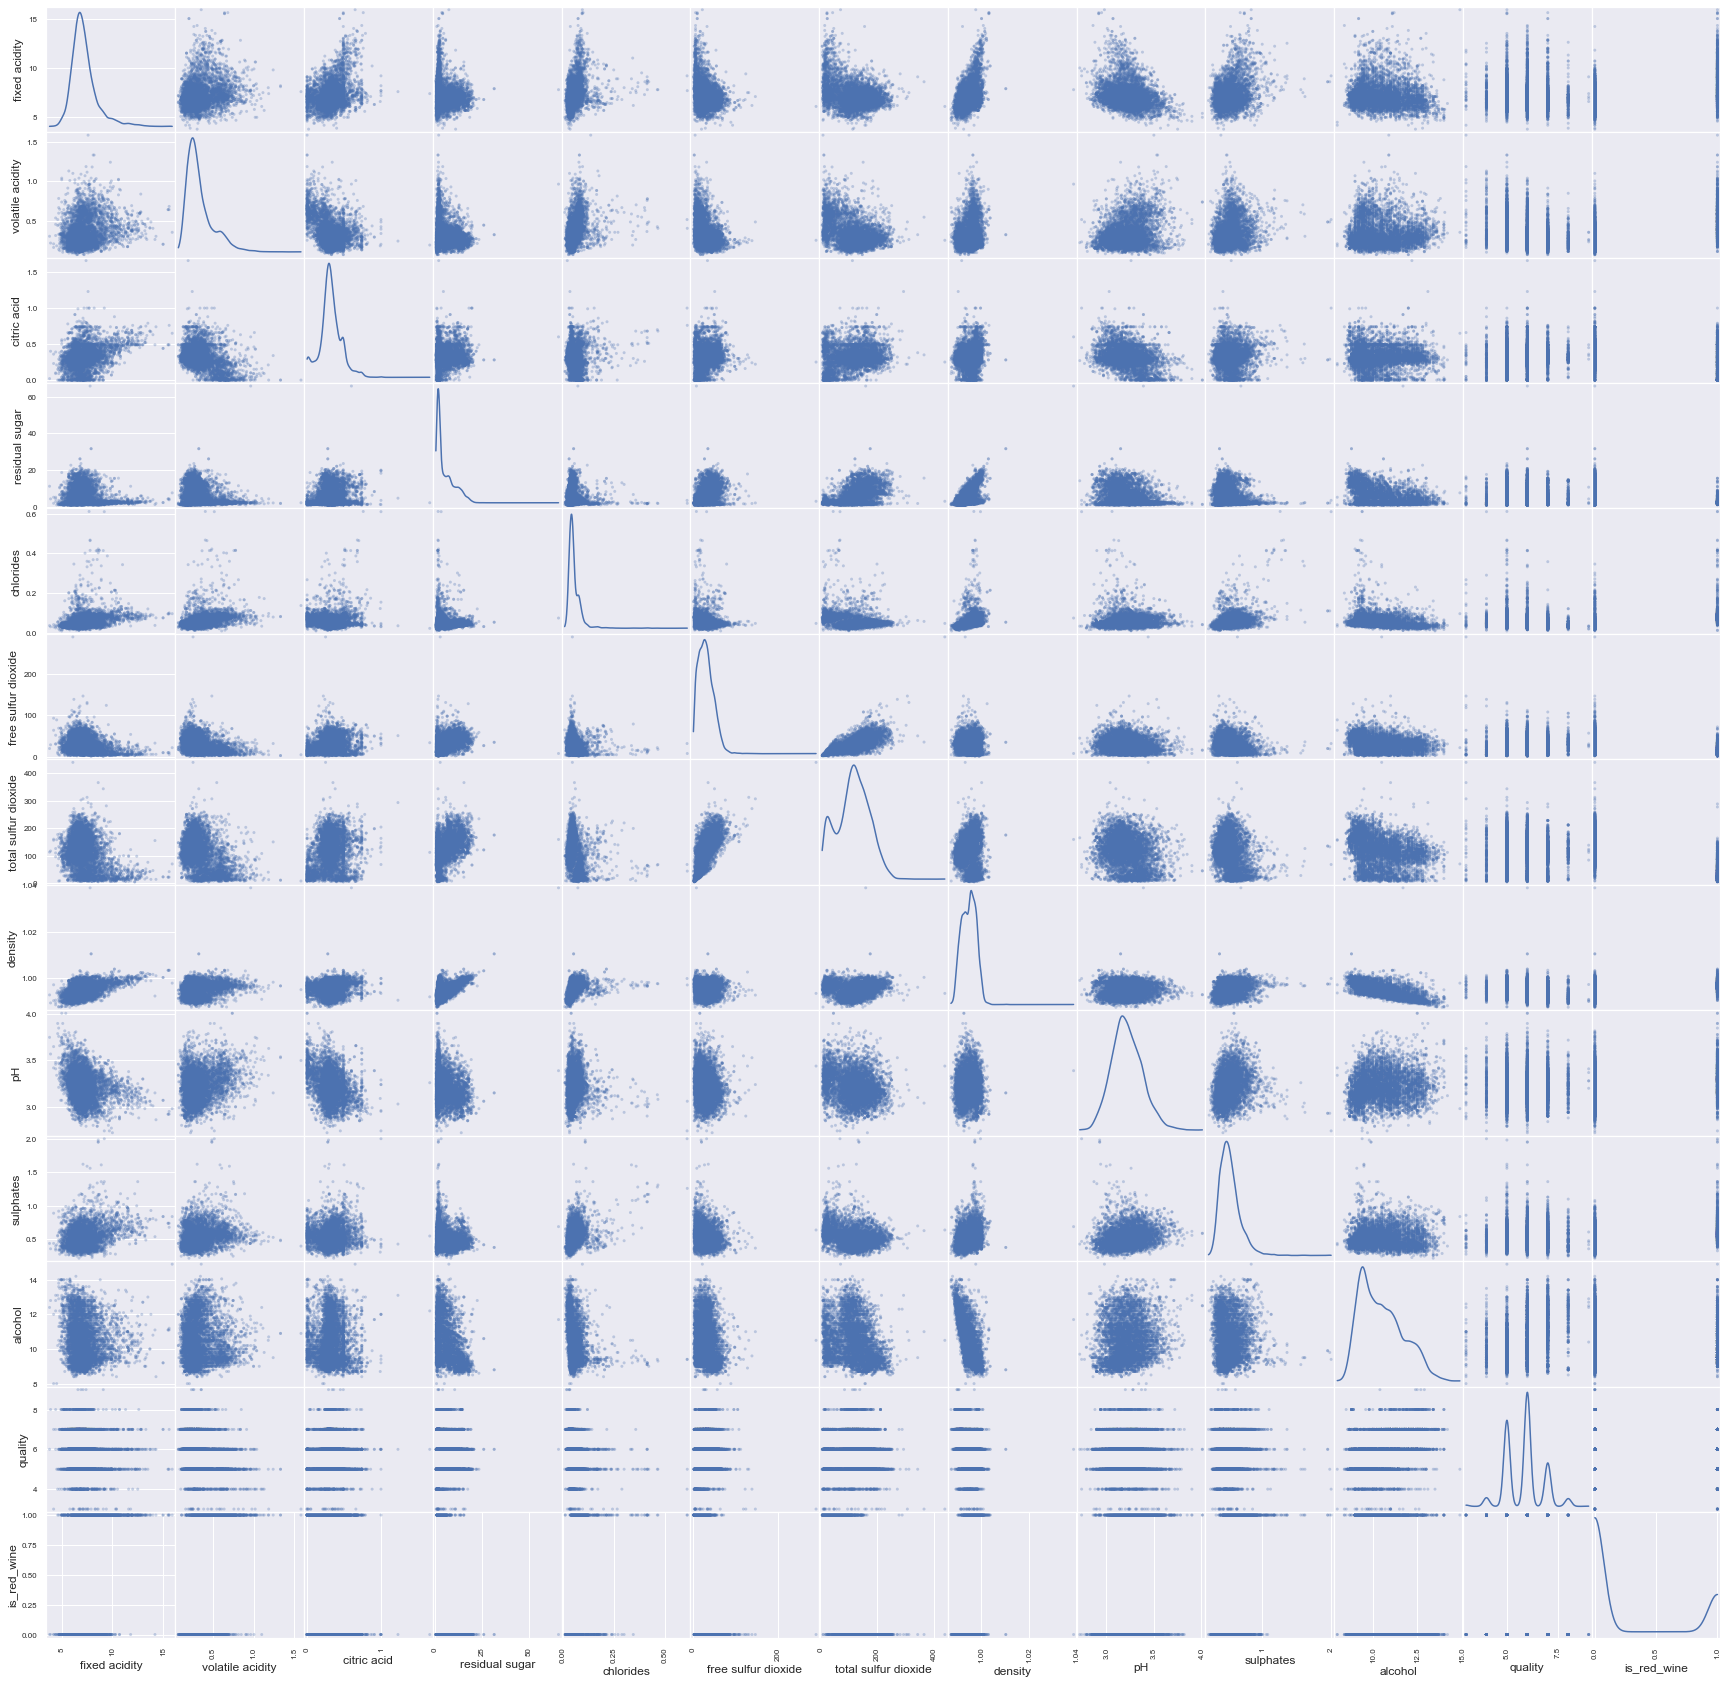

In [5]:
pd.plotting.scatter_matrix(dataset, alpha = 0.3, figsize = (30,30), diagonal = 'kde');

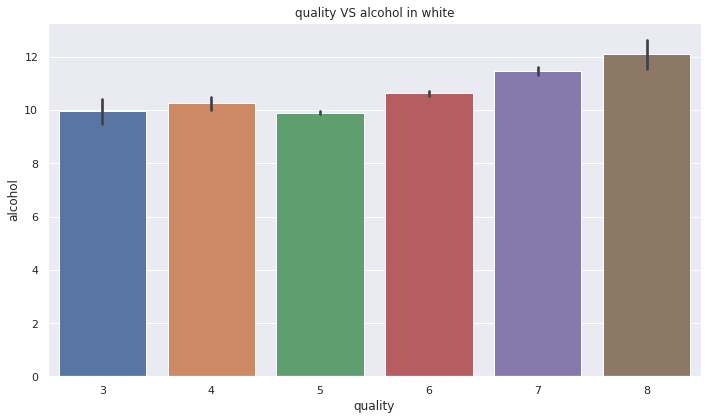

<Figure size 432x288 with 0 Axes>

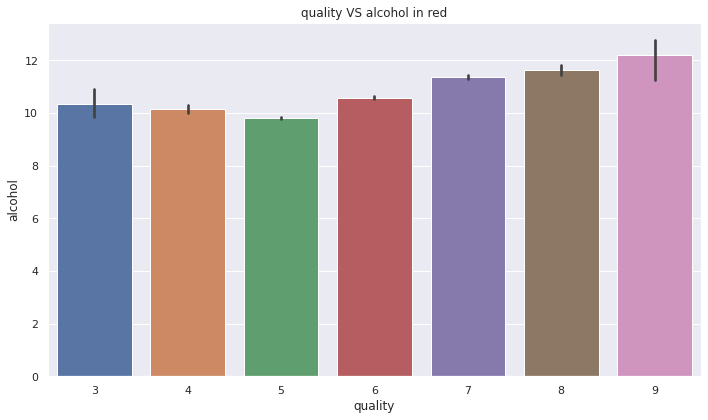

<Figure size 432x288 with 0 Axes>

In [7]:
#We can visualize relationships of discreet values better with a bar plot

fig, axs = plt.subplots(ncols=1,figsize=(10,6))
sns.barplot(x='quality', y='alcohol', data=dataset[dataset.type=="red"], ax=axs)
plt.title('quality VS alcohol in white')

plt.tight_layout()
plt.show()
plt.gcf().clear()

fig, axs = plt.subplots(ncols=1,figsize=(10,6))
sns.barplot(x='quality', y='alcohol', data=dataset[dataset.type=="white"], ax=axs)
plt.title('quality VS alcohol in red')

plt.tight_layout()
plt.show()
plt.gcf().clear()


Abans de començar amb els exercicis, preparaem les dades per a que sigui una classificació binaria

In [5]:
#Defining the splits for categories. 1-5 will be poor quality, 6-10 will be great
bins = [1,5,10]

#0 for low quality, 1 for average, 2 for great quality
quality_labels=[0,1]
dataset['quality_categorical'] = pd.cut(dataset['quality'], bins=bins, labels=quality_labels, include_lowest=True)
# Split the data into features and target label
quality_raw = dataset['quality_categorical']
features_raw = dataset.drop(['type', 'quality', 'quality_categorical'], axis = 1)


In [208]:
def normalitzador_de_dades(data):
    # TODO aplica algun tipus de normalitzador als atributs
    return (data - data.mean())/data.std()

In [138]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_raw, 
                                                    quality_raw, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples. {:.1f}% is positive".format(X_train.shape[0], 100*sum(y_train)/y_train.shape[0]))
print("Testing set has {} samples. {:.1f}% is positive".format(X_test.shape[0], 100*sum(y_test)/y_test.shape[0]))

display(X_test)

Training set has 5170 samples. 63.1% is positive
Testing set has 1293 samples. 64.3% is positive


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,is_red_wine
3859,7.300,0.250,0.260,7.200,0.048,52.000,207.000,0.996,3.120,0.370,9.200,0
4675,5.700,0.210,0.370,4.500,0.040,58.000,140.000,0.993,3.290,0.620,10.600,0
513,7.400,0.360,0.330,1.400,0.025,27.000,55.000,0.992,3.210,0.330,11.200,0
5490,9.000,0.450,0.490,2.600,0.084,21.000,75.000,0.999,3.350,0.570,9.700,1
4329,6.400,0.230,0.260,8.100,0.054,47.000,181.000,0.995,3.120,0.490,9.400,0
...,...,...,...,...,...,...,...,...,...,...,...,...
410,7.200,0.250,0.390,18.950,0.038,42.000,155.000,1.000,2.970,0.470,9.000,0
4562,5.600,0.180,0.300,10.200,0.028,28.000,131.000,0.995,3.490,0.420,10.800,0
5626,6.400,0.570,0.020,1.800,0.067,4.000,11.000,0.997,3.460,0.680,9.500,1
1248,7.200,0.180,0.310,1.100,0.045,20.000,73.000,0.993,3.320,0.400,10.800,0


## A. Ús LogisticRegression (20%)

En aquesta secció us demanem que apliqueu de sklearn el model de [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html):

Si feu proves amb diferents parametres, guardeu els resultats que obtingueu en una taula de pandas i els mostreu.

* Guarda resultats de temps, de precisió, de accuracy, tant de train com de test


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import time

def entrena_prediu_evalua(model, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - model: el objecte que s'entrenarà
       - sample_size: el número de mostres del training set que es farán servir (en %)
       - X_train: caracteristiques entrenament
       - y_train: etiqueta entrenament
       - X_test: caracteristiques test
       - y_test: etiqueta test
    '''
    
    results = {}
    time0 = time.time()
    """
    Entrenar el model tenint en compte el 'sample_size' 
    """
    model.fit(X_train[:int(len(X_train)*sample_size)], y_train[:int(len(y_train)*sample_size)])
    time1 = time.time()
    
    """
    Obtenir les prediccions del model sobre el conjunt d'entrenament i sobre el conjunt de test
    """
    time2 = time.time()
    results['prediction'] = model.predict(X_test)
    time3 = time.time()
    """
    Calcular el accuracy i el F1-score del train i del test
    """
    results['sample_size'] = sample_size
    results['accuracy'] = accuracy_score(y_test, results['prediction'])
    results['f1-score'] = f1_score(y_test, results['prediction'])
    results['time_fit'] = time1 - time0
    results['time_pred'] = time3 - time2
    results['time_total'] = results['time_fit']+ results['time_pred']
    results['coef'] = model.coef_
    results['intercept'] = model.intercept_
    print("{} s'ha entrenat amb el {}% de mostres.".format(model.__class__.__name__, sample_size * 100))
    return results



In [13]:
clf = LogisticRegression() # model
samples = 1  # utilitza valors com 0.01, 0.1 o 1, que hauran de equivaldre a 1%, 10%, 100%
results = entrena_prediu_evalua(clf, samples, X_train, y_train, X_test, y_test)
print(results)

LogisticRegression s'ha entrenat amb el 100% de mostres.
{'prediction': array([0, 1, 1, ..., 0, 1, 1]), 'sample_size': 1, 'accuracy': 0.7385924207269915, 'f1-score': 0.8041714947856315, 'time_fit': 0.10370302200317383, 'time_pred': 0.0007293224334716797, 'time_total': 0.10443234443664551, 'coef': array([[-0.15971071, -4.31709269,  0.09368315,  0.05516278, -0.47670354,
         0.01901657, -0.00982637, -1.2743595 , -1.35176831,  2.00727748,
         0.9030443 ,  0.12801335]]), 'intercept': array([-1.34055485])}


## B. Regularitzadors (40%)

* Descriu el parametre **penalty** de LogisticRegression {‘l1’, ‘l2’, ‘elasticnet’, ‘none’}

* Hi ha alguna regularitzador que no està implementat en segons quin **solver**. Haureu de trobar la combinació que funciona.

* Què representen els atributs *coef_* i *intercept_*. Mostra'ls. Hi veus alguna diferencia depenen del regularitzador utilitzat?

* Què fa el parametre *C*. En quins casos afecta? Fes una taula mostrant els resultats.



In [32]:
dic = {'solver': [], 'penalty':[], 'Sum_Coef': [], 'accuracy' : [], 'f1-score': [], 'time_total' : []}
SP = {'lbfgs' : ['l2', 'none'], 'newton-cg' : ['l2', 'none'], 'sag' : ['l2', 'none'], 'liblinear' : ['l1', 'l2'], 'saga' : ['l1', 'none'] }
#solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
#for solv in solver:
for sol in SP.keys():
    for pen in SP[sol]:
        clf = (LogisticRegression(solver = sol, penalty = pen) if pen != 'l1' else LogisticRegression(solver = sol, penalty = pen, l1_ratio = 1))
        samples = 1
        results = entrena_prediu_evalua(clf, samples, X_train, y_train, X_test, y_test)
        dic['solver'].append(sol)
        dic['penalty'].append(pen)
        dic['Sum_Coef'].append(np.sum(abs(results['coef'])))
        dic['accuracy'].append(results['accuracy'])
        dic['f1-score'].append(results['f1-score'])
        dic['time_total'].append(results['time_total'])
df = pd.DataFrame(dic)
df

LogisticRegression s'ha entrenat amb el 100% de mostres.
LogisticRegression s'ha entrenat amb el 100% de mostres.
LogisticRegression s'ha entrenat amb el 100% de mostres.
LogisticRegression s'ha entrenat amb el 100% de mostres.
LogisticRegression s'ha entrenat amb el 100% de mostres.
LogisticRegression s'ha entrenat amb el 100% de mostres.
LogisticRegression s'ha entrenat amb el 100% de mostres.
LogisticRegression s'ha entrenat amb el 100% de mostres.
LogisticRegression s'ha entrenat amb el 100% de mostres.
LogisticRegression s'ha entrenat amb el 100% de mostres.


,solver,penalty,Sum_Coef,accuracy,f1-score,time_total
0,lbfgs,l2,10.796,0.739,0.804,0.094
1,lbfgs,none,9.739,0.735,0.804,0.075
2,newton-cg,l2,9.239,0.742,0.806,0.113
3,newton-cg,none,148.648,0.739,0.804,0.226
4,sag,l2,1.386,0.650,0.763,0.101
5,sag,none,1.388,0.650,0.763,0.143
6,liblinear,l1,14.272,0.742,0.806,0.348
7,liblinear,l2,13.062,0.738,0.803,0.043
8,saga,l1,0.902,0.647,0.767,0.143
9,saga,none,0.906,0.647,0.767,0.168


* El paràmetre penalty descriu la norma utilitzada per la penalització en Regresor Logístic, és a dir, com penalitza el model quan s'equivoca en una classificació. Van directament relacionats amb el tipus de solver, per cada solver, s'admet un tipus o altre de penalty. En la taula de la casella superior, podem veure els accuracys i scores dels diferents solvers amb les diferents penalties que admenten. En aquest cas, veiem que obtenim millors resultats si utilitzem el solver 'liblinear' amb el penalty = 'l1'.
* En la taula superiror ja s'han ordenat les dades de manera que cada solver funcioni només amb els penalties que pot prendre per paràmetre. Els solvers poden prendre aquests penalties: lbfgs, newton-cg i sag només poden pendre 'l2' i 'none', liblinear pot pendre 'elasticnet','l1' i 'l2' i saga  pot pendre 'l1' i 'none'. Per als models que accepten 'l1', sels ha d'atribuir un paràmetre 'l1-ratio', que per fer la prova l'he posat a 1.  
* El atribut coef_ representa els coeficients del polinomi que descriu la funció que s'ha definit amb el training i el atribut intercept_ representa els bias afegits. Es mostren a la taula superior (el valor coef com la suma dels coeficients del polinomi).
* El paràmetre C representa la força amb la que el model regularitza, és a dir, la inversa de la lambda de la funció de cost. Com més petit és el valor, més fort regularitza. A continuació podem veure la taula de resultats variant la C per cada solver i cada penalty. Fem un estudi amb C més gran d'1 i amb C més petit que 1. Si es vol veure el df complert, es troba en la variable dfC.

In [94]:
###Creo un dataframe amb l'accuracy i l'score variant el solver i el penalti i la C.
##Recomano no executar ja que el temps d'execució és elevat degut a la complexitat de la instrucció.

dic = {'solver': [], 'penalty':[], 'C' : [],'Sum_Coef': [], 'accuracy' : [], 'f1-score': [], 'time_total' : []}
C = np.concatenate((np.linspace(0.001, 1, 10), np.linspace(10, 10000, 10)), axis = None)
for sol in SP.keys():
    for pen in SP[sol]:
        for c in C:
            clf = (LogisticRegression(solver = sol, penalty = pen, C = c) if pen != 'l1' else LogisticRegression(solver = sol, penalty = pen, l1_ratio = 1, C = c))
            samples = 1
            results = entrena_prediu_evalua(clf, samples, X_train, y_train, X_test, y_test)
            dic['solver'].append(sol)
            dic['penalty'].append(pen)
            dic['C'].append(c)
            dic['Sum_Coef'].append(np.sum(abs(results['coef'])))
            dic['accuracy'].append(results['accuracy'])
            dic['f1-score'].append(results['f1-score'])
            dic['time_total'].append(results['time_total'])
dfC = pd.DataFrame(dic)


LogisticRegression s'ha entrenat amb el 100% de mostres.
LogisticRegression s'ha entrenat amb el 100% de mostres.
LogisticRegression s'ha entrenat amb el 100% de mostres.
LogisticRegression s'ha entrenat amb el 100% de mostres.
LogisticRegression s'ha entrenat amb el 100% de mostres.
LogisticRegression s'ha entrenat amb el 100% de mostres.
LogisticRegression s'ha entrenat amb el 100% de mostres.
LogisticRegression s'ha entrenat amb el 100% de mostres.
LogisticRegression s'ha entrenat amb el 100% de mostres.
LogisticRegression s'ha entrenat amb el 100% de mostres.
LogisticRegression s'ha entrenat amb el 100% de mostres.
LogisticRegression s'ha entrenat amb el 100% de mostres.
LogisticRegression s'ha entrenat amb el 100% de mostres.
LogisticRegression s'ha entrenat amb el 100% de mostres.
LogisticRegression s'ha entrenat amb el 100% de mostres.
LogisticRegression s'ha entrenat amb el 100% de mostres.
LogisticRegression s'ha entrenat amb el 100% de mostres.
LogisticRegression s'ha entrena

LogisticRegression s'ha entrenat amb el 100% de mostres.
LogisticRegression s'ha entrenat amb el 100% de mostres.
LogisticRegression s'ha entrenat amb el 100% de mostres.
LogisticRegression s'ha entrenat amb el 100% de mostres.
LogisticRegression s'ha entrenat amb el 100% de mostres.
LogisticRegression s'ha entrenat amb el 100% de mostres.
LogisticRegression s'ha entrenat amb el 100% de mostres.
LogisticRegression s'ha entrenat amb el 100% de mostres.
LogisticRegression s'ha entrenat amb el 100% de mostres.
LogisticRegression s'ha entrenat amb el 100% de mostres.
LogisticRegression s'ha entrenat amb el 100% de mostres.
LogisticRegression s'ha entrenat amb el 100% de mostres.
LogisticRegression s'ha entrenat amb el 100% de mostres.
LogisticRegression s'ha entrenat amb el 100% de mostres.
LogisticRegression s'ha entrenat amb el 100% de mostres.
LogisticRegression s'ha entrenat amb el 100% de mostres.
LogisticRegression s'ha entrenat amb el 100% de mostres.
LogisticRegression s'ha entrena

Gràfics amb C més gran que 1


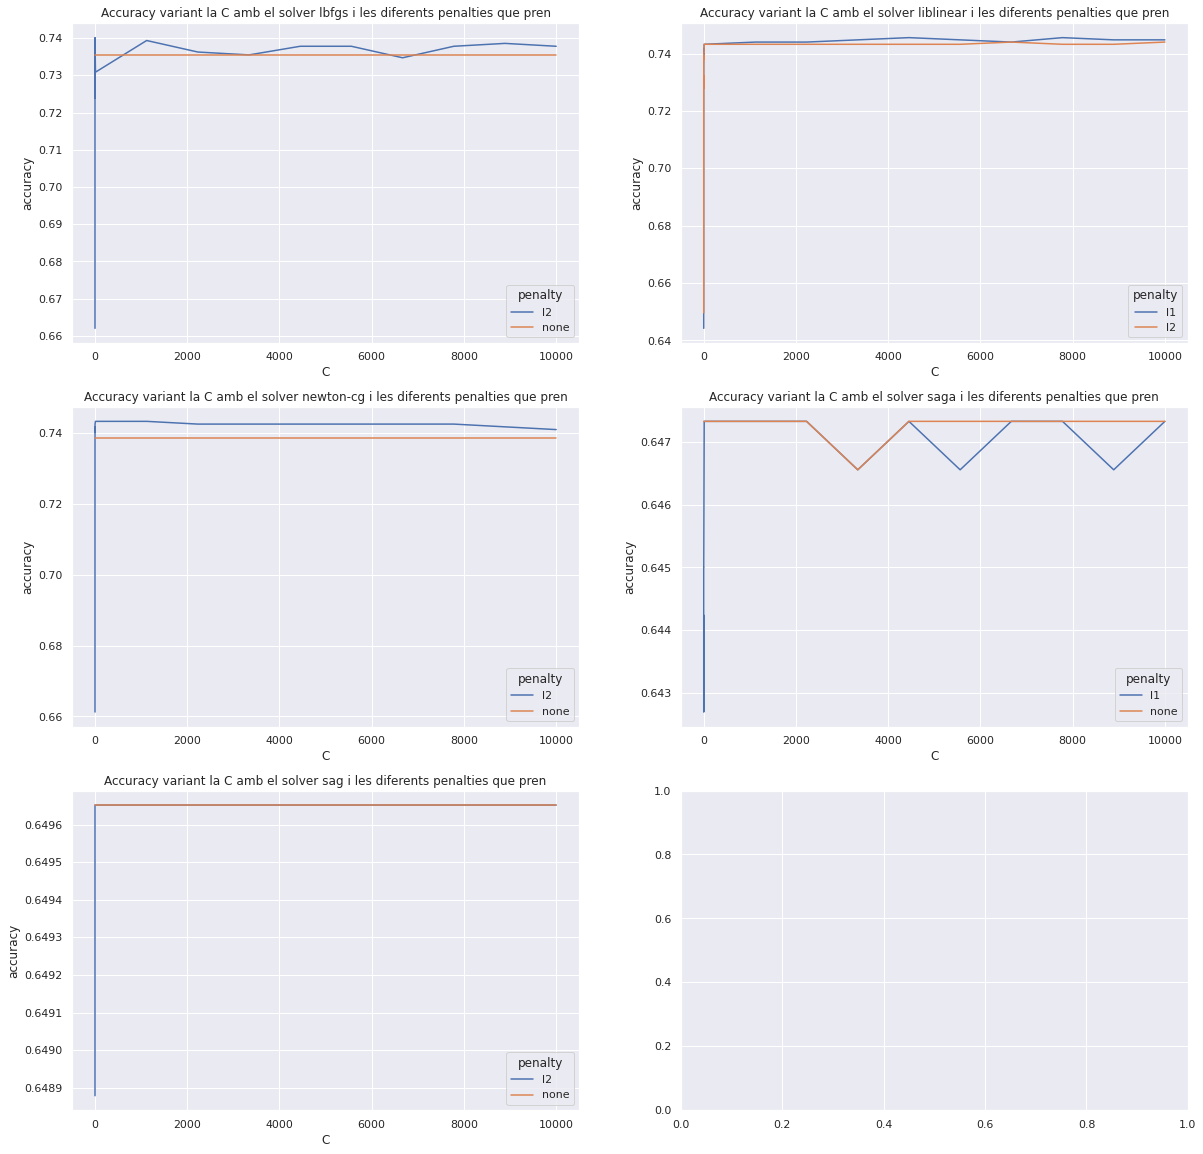

Gràfics amb C més petit que 1


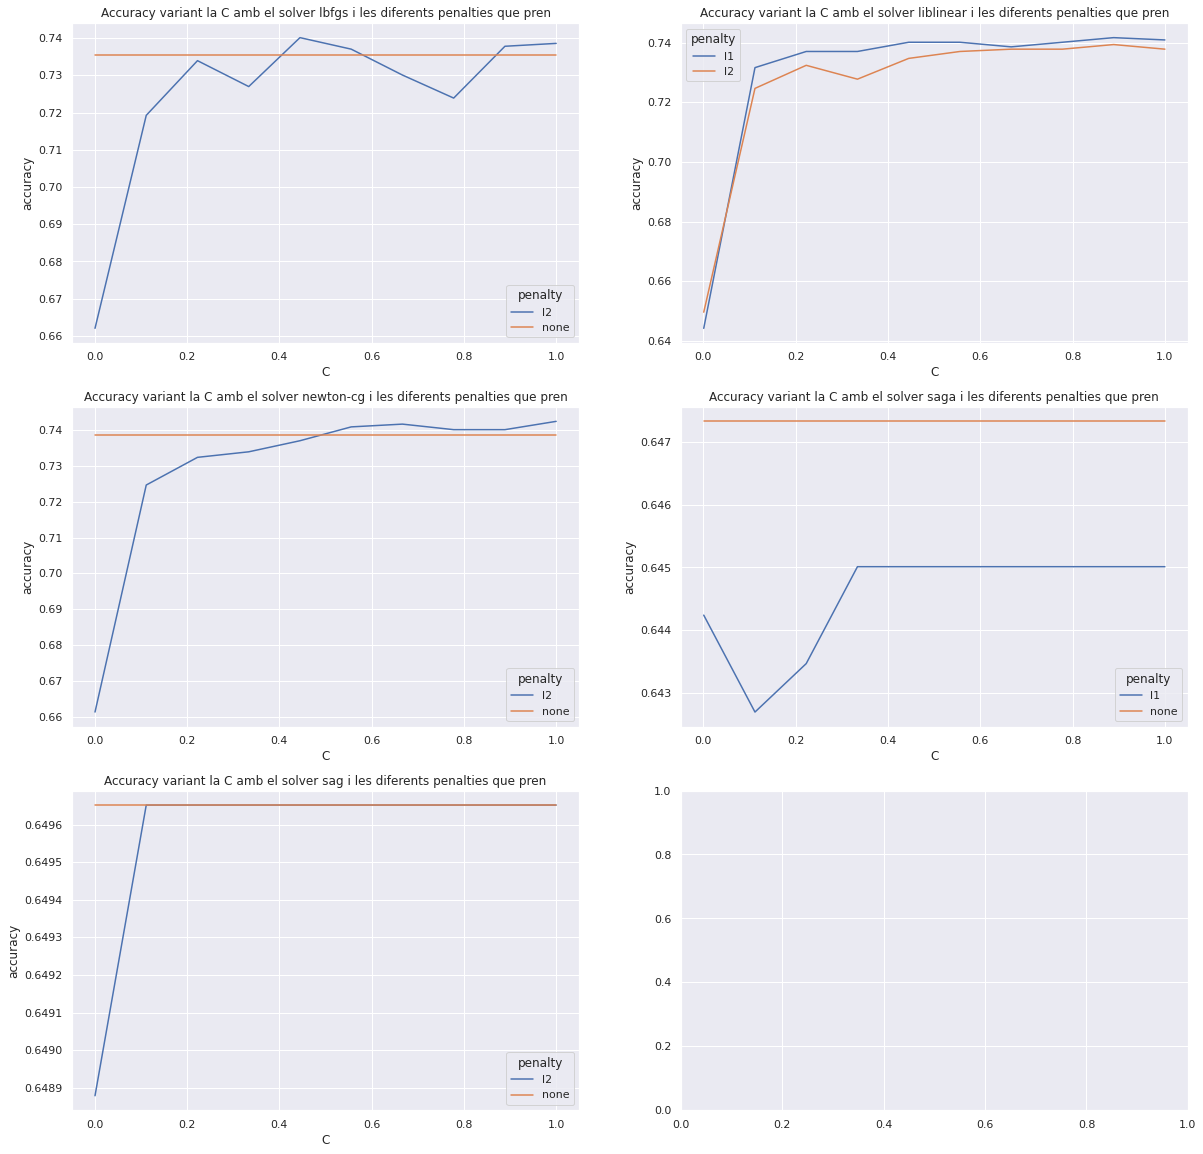

In [96]:

print('Gràfics amb C més gran que 1')
f, ax = plt.subplots(3,2,figsize = (20,20))
index1 = 0
index2 = 0

for sol in SP.keys():
    g = sns.lineplot(data = dfC[dfC.solver == sol], x = 'C', y = 'accuracy', hue = 'penalty' , ax = ax[index1][index2])
    g.set_title( f'Accuracy variant la C amb el solver {sol} i les diferents penalties que pren')
    index1 = index1 + 1 if index1 < 2 else 0
    index2 = index2 if index1 != 0 else index2 + 1
plt.show()

#Plots amb C més petit que 1 ja que en els gràfics superiors no es pot apreciar correcatament.
print('Gràfics amb C més petit que 1')
dfC2 = dfC[dfC.C < 1.01]
f, ax = plt.subplots(3,2,figsize = (20,20))
index1 = 0
index2 = 0

for sol in SP.keys():
    g = sns.lineplot(data = dfC2[dfC2.solver == sol], x = 'C', y = 'accuracy', hue = 'penalty' , ax = ax[index1][index2])
    g.set_title( f'Accuracy variant la C amb el solver {sol} i les diferents penalties que pren')
    index1 = index1 + 1 if index1 < 2 else 0
    index2 = index2 if index1 != 0 else index2 + 1

plt.show()

Amb les dades sense normalitzar, obtenim l'accuracy maxim amb el solver liblinear i penalty l1 i el valor és 0.746

## C. Demostració Error de Bias (20%)

* Què hem de fer per veure que el model que estem provant té un error de bias molt alt? (es a dir, model simple)

* Què passa si fem servir poques dades per entrenar? (mostra com varien els resultats segons % de entrenament)

* I si utilitzem poques iteracions limitant el *max_iter*


* Per veure que tenim un error de bias alt hem de veure que tenim un model massa simple, que no té molta accuracy predint el el train data i tampoc predint noves dades que li passem. Ho podem veure també ja que quan passa, normalment estem passant molt poques dades i hem de buscar la forma d'augmentar la nostra BD o estem fent massa poques iteracions en el model per estalviar còmput. També (pot ser) que poguem veure que el nostre model esta donant molt pes només a alguns atributs mentres que altres els omet del tot, és a dir, que es queda gairebé amb el primer valor dels coeficients del polinomi. 

* Si fem servir poques mostres per entrenar estem fent undefitting, el que fa que el nostre model no s'ajusti correctament a les dades que tenim, fent així que el model sigui simple i poc òptim. Amb un problema d'underfitting, el que ens pot passar és que el nostre model no tingui en compte relacions entre l'input i l'output que són importants i que tingui en compte relacions irellevants. Podem veure a continuació les gràfiques i dades del model fent servir diferents % de dades per entrenar. Tal i com es pot apreciar, obtenim el millor accuracy i score en un punt intermig de les dades.
* Si utilitzem poques iteracions, donem poc marge al model per entrenar-se i actualitzar els pesos, obtenint així també un problema de Bias, ja que el model es queda en iteracions superficials, fent que no relacioni bé les dades. L'estudi en les nostres dades està a 2 caselles inferiors.

### Modificant sample_size

In [98]:
a = np.linspace(0.1, 1, 100)
Prova = [entrena_prediu_evalua(clf, i, X_train, y_train, X_test, y_test) for i in a]
df = {'sample_size' : [],'accuracy' : [], 'f1_score' : [], 'total_time': [], 'coef': []}
for x in Prova:
    df['sample_size'].append(x['sample_size'])
    df['accuracy'].append(x['accuracy'])
    df['f1_score'].append(x['f1-score'])
    df['total_time'].append(x['time_total'])
    tmp = x['coef'].flatten()
    df['coef'].append(np.dot(tmp.T, tmp))
df = pd.DataFrame(df)

LogisticRegression s'ha entrenat amb el 10.0% de mostres.
LogisticRegression s'ha entrenat amb el 10.90909090909091% de mostres.
LogisticRegression s'ha entrenat amb el 11.81818181818182% de mostres.
LogisticRegression s'ha entrenat amb el 12.727272727272728% de mostres.
LogisticRegression s'ha entrenat amb el 13.636363636363635% de mostres.
LogisticRegression s'ha entrenat amb el 14.545454545454545% de mostres.
LogisticRegression s'ha entrenat amb el 15.454545454545453% de mostres.
LogisticRegression s'ha entrenat amb el 16.363636363636363% de mostres.
LogisticRegression s'ha entrenat amb el 17.272727272727273% de mostres.
LogisticRegression s'ha entrenat amb el 18.181818181818183% de mostres.
LogisticRegression s'ha entrenat amb el 19.090909090909093% de mostres.
LogisticRegression s'ha entrenat amb el 20.0% de mostres.
LogisticRegression s'ha entrenat amb el 20.90909090909091% de mostres.
LogisticRegression s'ha entrenat amb el 21.81818181818182% de mostres.
LogisticRegression s'ha 

In [99]:
df

,sample_size,accuracy,f1_score,total_time,coef
0,0.100,0.626,0.752,0.024,0.025
1,0.109,0.626,0.754,0.017,0.026
2,0.118,0.630,0.756,0.016,0.030
3,0.127,0.630,0.754,0.017,0.032
4,0.136,0.626,0.753,0.019,0.035
...,...,...,...,...,...
95,0.964,0.644,0.766,0.112,0.150
96,0.973,0.645,0.767,0.113,0.151
97,0.982,0.643,0.765,0.117,0.154
98,0.991,0.643,0.765,0.115,0.157


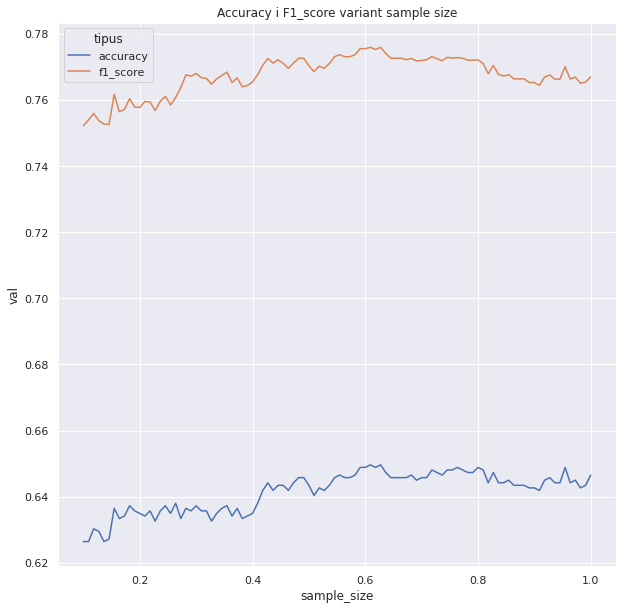

In [127]:
##Modifico DF per poder posar els dos gràfics superposats
dic = {'tipus' : ['accuracy'] * 100 + ['f1_score'] * 100 , 'val' : [], 'sample_size': []}
for a, b in zip(df['accuracy'], df['sample_size']):
    dic['val'].append(a)
    dic['sample_size'].append(b)
for a, b in zip(df['f1_score'], df['sample_size']):
    dic['val'].append(a)
    dic['sample_size'].append(b)
df2 = pd.DataFrame(dic)
plt.figure(1, figsize = (10,10))
g = sns.lineplot(data = df2, x = 'sample_size', y = 'val', hue = 'tipus')
g.set_title('Accuracy i F1_score variant sample size')
plt.show()


### Modificant max_iter del regressor

In [139]:
a = np.linspace(1, 1000 , 100)
models = [LogisticRegression(max_iter = i) for i in a]
df = {'sample_size' : [],'accuracy' : [], 'f1_score' : [], 'total_time': [], 'coef': []}
for model in models:
    x = entrena_prediu_evalua(model, 1, X_train, y_train, X_test, y_test)
    df['sample_size'].append(x['sample_size'])
    df['accuracy'].append(x['accuracy'])
    df['f1_score'].append(x['f1-score'])
    df['total_time'].append(x['time_total'])
    tmp = x['coef'].flatten()
    df['coef'].append(np.dot(tmp.T, tmp))
df = pd.DataFrame(df)

LogisticRegression s'ha entrenat amb el 100% de mostres.
LogisticRegression s'ha entrenat amb el 100% de mostres.
LogisticRegression s'ha entrenat amb el 100% de mostres.
LogisticRegression s'ha entrenat amb el 100% de mostres.
LogisticRegression s'ha entrenat amb el 100% de mostres.
LogisticRegression s'ha entrenat amb el 100% de mostres.
LogisticRegression s'ha entrenat amb el 100% de mostres.
LogisticRegression s'ha entrenat amb el 100% de mostres.
LogisticRegression s'ha entrenat amb el 100% de mostres.
LogisticRegression s'ha entrenat amb el 100% de mostres.
LogisticRegression s'ha entrenat amb el 100% de mostres.
LogisticRegression s'ha entrenat amb el 100% de mostres.
LogisticRegression s'ha entrenat amb el 100% de mostres.
LogisticRegression s'ha entrenat amb el 100% de mostres.
LogisticRegression s'ha entrenat amb el 100% de mostres.
LogisticRegression s'ha entrenat amb el 100% de mostres.
LogisticRegression s'ha entrenat amb el 100% de mostres.
LogisticRegression s'ha entrena

In [140]:
df

,sample_size,accuracy,f1_score,total_time,coef
0,1,0.643,0.782,0.015,0.000
1,1,0.640,0.778,0.022,0.006
2,1,0.657,0.777,0.026,0.056
3,1,0.645,0.757,0.033,0.350
4,1,0.701,0.780,0.043,6.247
...,...,...,...,...,...
95,1,0.737,0.803,0.823,30.433
96,1,0.737,0.803,0.798,30.427
97,1,0.738,0.803,0.774,30.500
98,1,0.739,0.803,0.795,29.598


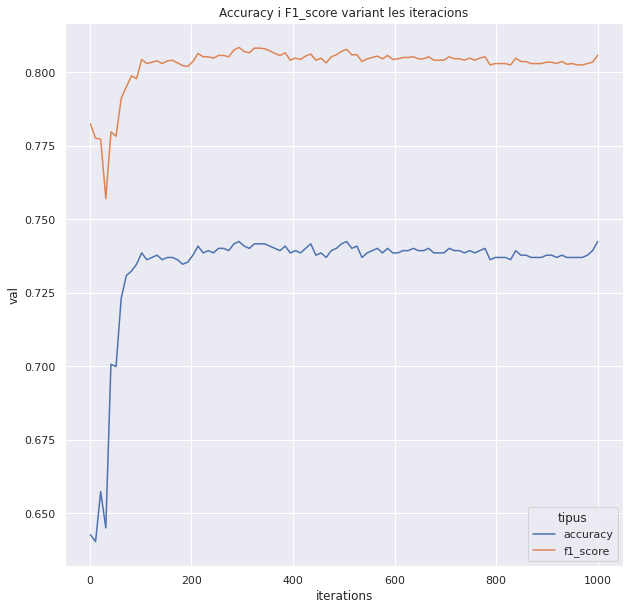

In [145]:
dic = {'tipus' : ['accuracy'] * 100 + ['f1_score'] * 100 , 'val' : [], 'iterations': []}
for a, b in zip(df['accuracy'], np.linspace(1, 1000 , 100)):
    dic['val'].append(a)
    dic['iterations'].append(b)
for a, b in zip(df['f1_score'], np.linspace(1, 1000 , 100)):
    dic['val'].append(a)
    dic['iterations'].append(b)
df2 = pd.DataFrame(dic)
plt.figure(1, figsize = (10,10))
g = sns.lineplot(data = df2, x = 'iterations', y = 'val', hue = 'tipus')
g.set_title('Accuracy i F1_score variant les iteracions')
plt.show()

Tal i com podem veure en la gràfica superior, al principi trobem un clar cas d'underfitting, fent que les preddicions del model siguin molt més incorrectes que amb més dades.

## D. Demostració Error de Variance (20%)

* Què hem de fer per veure que el model que estem provant té un error de variança molt alt? (es a dir, model massa complexe)

* Crea models de features més complexes amb [sklearn.preprocessing.PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)

* Podem reduir el error de variança si enlloc de classificar el vi blanc i el negre, els separessim?

* Sabrieu explicar-me aquesta [gráfica](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ridge_path.html)? Podeu generar-la amb aquestes dades de entrenament?



* Per veure que el model té un error de variança molt alt, hauriem de veure que l'accuracy del model en el training set és gairebé perfecte, pero a la hora de passar-li dades que no ha vist al model, dónaria un accuracy dolent. 


### Models amb features més complexes

El codi que hi ha a continuació és la prova amb diferents valors a 'C' per cada solver i cada penalty que admet el solver, amb les gràfiques dels resultats finals a la última cel·la. He obtingut resultats interessants, sobretot amb les variacions dels solvers ja que els accuracys varien molt.
Al final, sí que he obtingut un millor resultat ampliant les dades que amb les dades originals. El millor resultat ha sigut amb el solver 'liblinear', la penality 'l1' i la 'C' a 10000, amb un 77% d'accuracy i un 0.822 d'F1-score. Tot i els bons resultats amb accuracy, el model ha tardat 4 minuts en entrenarse, que és molt comparat amb els altres models.

In [216]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(3)
X_train_p = poly.fit_transform(X_train)
X_test_p = poly.fit_transform(X_test)
x_test_norm = normalitzador_de_dades(X_test_p)
x_train_norm = normalitzador_de_dades(X_train_p)

In [217]:
clt = LogisticRegression(max_iter= 100, C = 500 )
result = entrena_prediu_evalua(clt, 1, x_train_norm, y_train, x_test_norm, y_test)

LogisticRegression s'ha entrenat amb el 100% de mostres.


In [220]:
#L'execució d'aquesta cel·la dura 30 minuts

dic = {'solver': [], 'penalty':[], 'C' : [],'Sum_Coef': [], 'accuracy' : [], 'f1-score': [], 'time_total' : []}
C = np.concatenate((np.linspace(0.001, 1, 5), np.linspace(10, 10000, 5)), axis = None)
z = 0
for sol in SP.keys():
    for pen in SP[sol]:
        for c in C:
            clf = (LogisticRegression(solver = sol, penalty = pen, C = c) if pen != 'l1' else LogisticRegression(solver = sol, penalty = pen, l1_ratio = 1, C = c))
            samples = 1
            results = entrena_prediu_evalua(clf, 1, X_train_p, y_train, X_test_p, y_test)
            dic['solver'].append(sol)
            dic['penalty'].append(pen)
            dic['C'].append(c)
            dic['Sum_Coef'].append(np.sum(abs(results['coef'])))
            dic['accuracy'].append(results['accuracy'])
            dic['f1-score'].append(results['f1-score'])
            dic['time_total'].append(results['time_total'])
            z+=1
            print(z)
dfCL = pd.DataFrame(dic)

LogisticRegression s'ha entrenat amb el 100% de mostres.
1
LogisticRegression s'ha entrenat amb el 100% de mostres.
2
LogisticRegression s'ha entrenat amb el 100% de mostres.
3
LogisticRegression s'ha entrenat amb el 100% de mostres.
4
LogisticRegression s'ha entrenat amb el 100% de mostres.
5
LogisticRegression s'ha entrenat amb el 100% de mostres.
6
LogisticRegression s'ha entrenat amb el 100% de mostres.
7
LogisticRegression s'ha entrenat amb el 100% de mostres.
8
LogisticRegression s'ha entrenat amb el 100% de mostres.
9
LogisticRegression s'ha entrenat amb el 100% de mostres.
10
LogisticRegression s'ha entrenat amb el 100% de mostres.
11
LogisticRegression s'ha entrenat amb el 100% de mostres.
12
LogisticRegression s'ha entrenat amb el 100% de mostres.
13
LogisticRegression s'ha entrenat amb el 100% de mostres.
14
LogisticRegression s'ha entrenat amb el 100% de mostres.
15
LogisticRegression s'ha entrenat amb el 100% de mostres.
16
LogisticRegression s'ha entrenat amb el 100% de m

In [273]:
print('Accuracy màxima:')
dfCL[dfCL.accuracy == dfCL.accuracy.max()]

Accuracy màxima:


,solver,penalty,C,Sum_Coef,accuracy,f1-score,time_total
69,liblinear,l1,10000.000,5060.943,0.770,0.822,167.329


Gràfics amb C més gran que 1


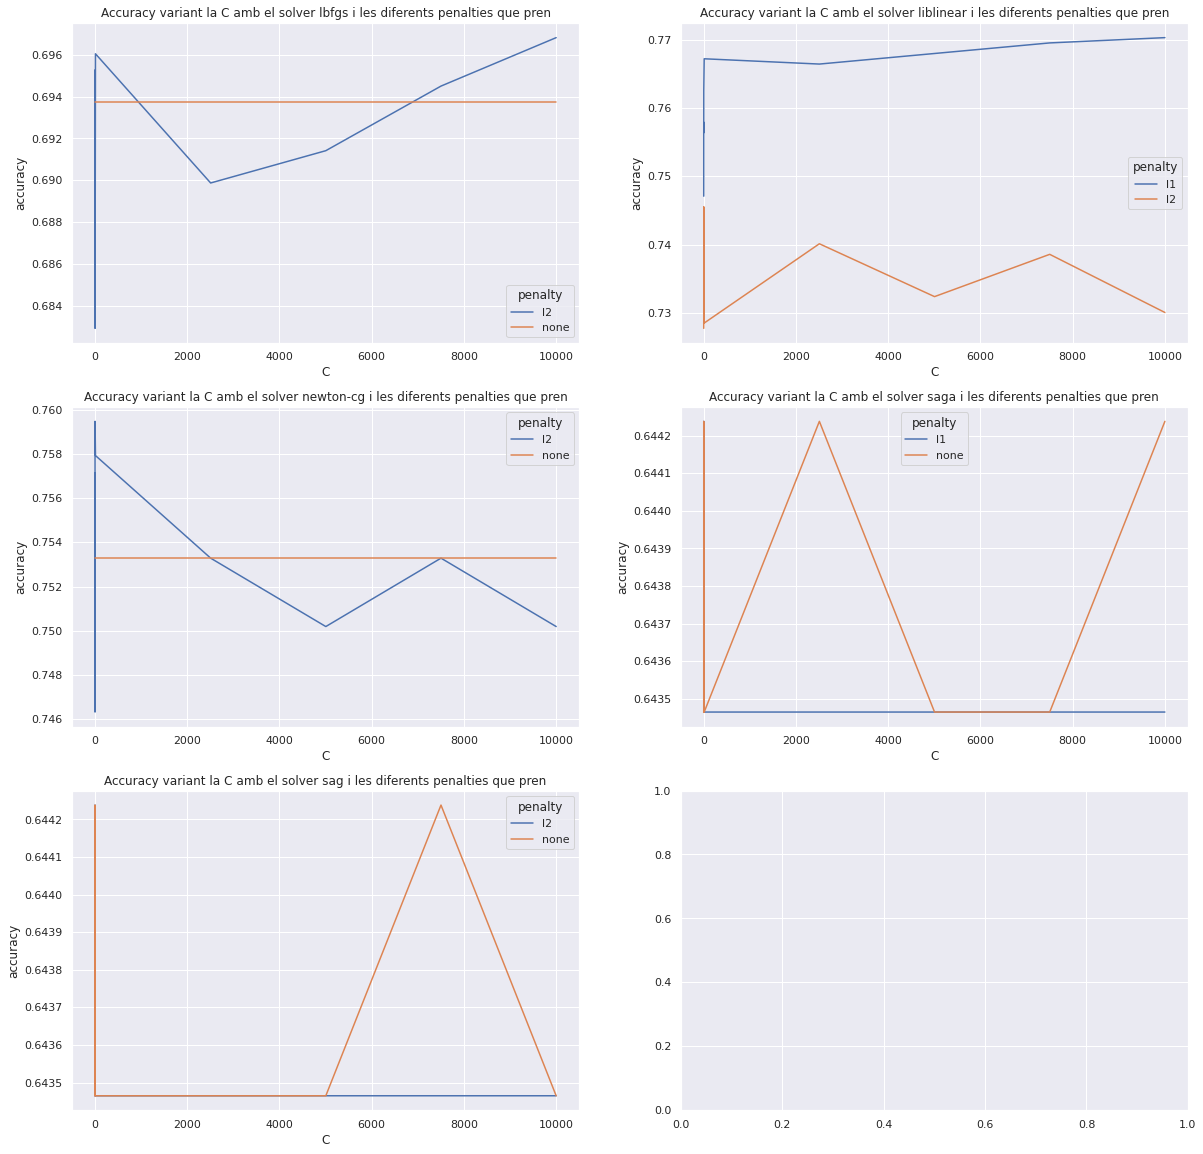

Gràfics amb C més petit que 1


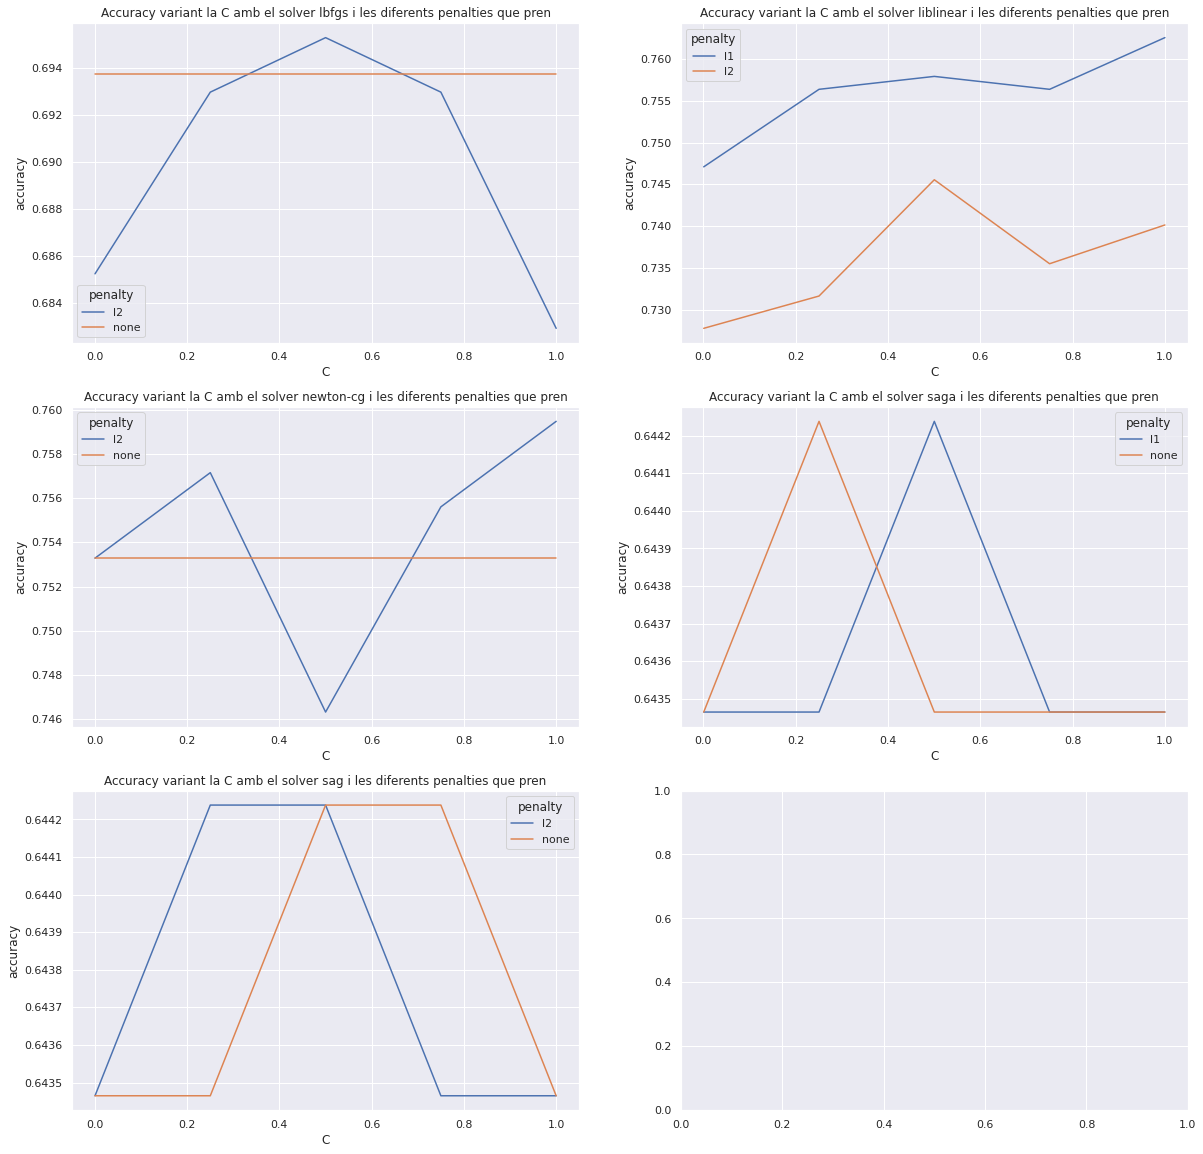

In [223]:

print('Gràfics amb C més gran que 1')
f, ax = plt.subplots(3,2,figsize = (20,20))
index1 = 0
index2 = 0

for sol in SP.keys():
    g = sns.lineplot(data = dfCL[dfCL.solver == sol], x = 'C', y = 'accuracy', hue = 'penalty' , ax = ax[index1][index2])
    g.set_title( f'Accuracy variant la C amb el solver {sol} i les diferents penalties que pren')
    index1 = index1 + 1 if index1 < 2 else 0
    index2 = index2 if index1 != 0 else index2 + 1
plt.show()

#Plots amb C més petit que 1 ja que en els gràfics superiors no es pot apreciar correcatament.
print('Gràfics amb C més petit que 1')
dfCL2 = dfCL[dfCL.C < 1.01]
f, ax = plt.subplots(3,2,figsize = (20,20))
index1 = 0
index2 = 0

for sol in SP.keys():
    g = sns.lineplot(data = dfCL2[dfCL2.solver == sol], x = 'C', y = 'accuracy', hue = 'penalty' , ax = ax[index1][index2])
    g.set_title( f'Accuracy variant la C amb el solver {sol} i les diferents penalties que pren')
    index1 = index1 + 1 if index1 < 2 else 0
    index2 = index2 if index1 != 0 else index2 + 1

plt.show()

* Sabrieu explicar-me aquesta [gráfica](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ridge_path.html)? Podeu generar-la amb aquestes dades de entrenament?

La gràfica representa l'efecte de la colinearalitat en els coeficients del estimador Ridge. Això vol dir que entrena un model Ridge, que és un model que utilitza la penalització 'l2', amb diferents valors de la alpha per veure com afecta a la seva colinearalitat.

A la cel·la següent trobem els mateixos valors d'alpha que els del exemple, entrenant el model Ridge amb les nostres dades augmentades i a la última cel·la el mateix però amb les nostres dades originals, sense augmentar. De totes maneres, tenim molts valors i no s'aprecia molt bé a la gràfica. 

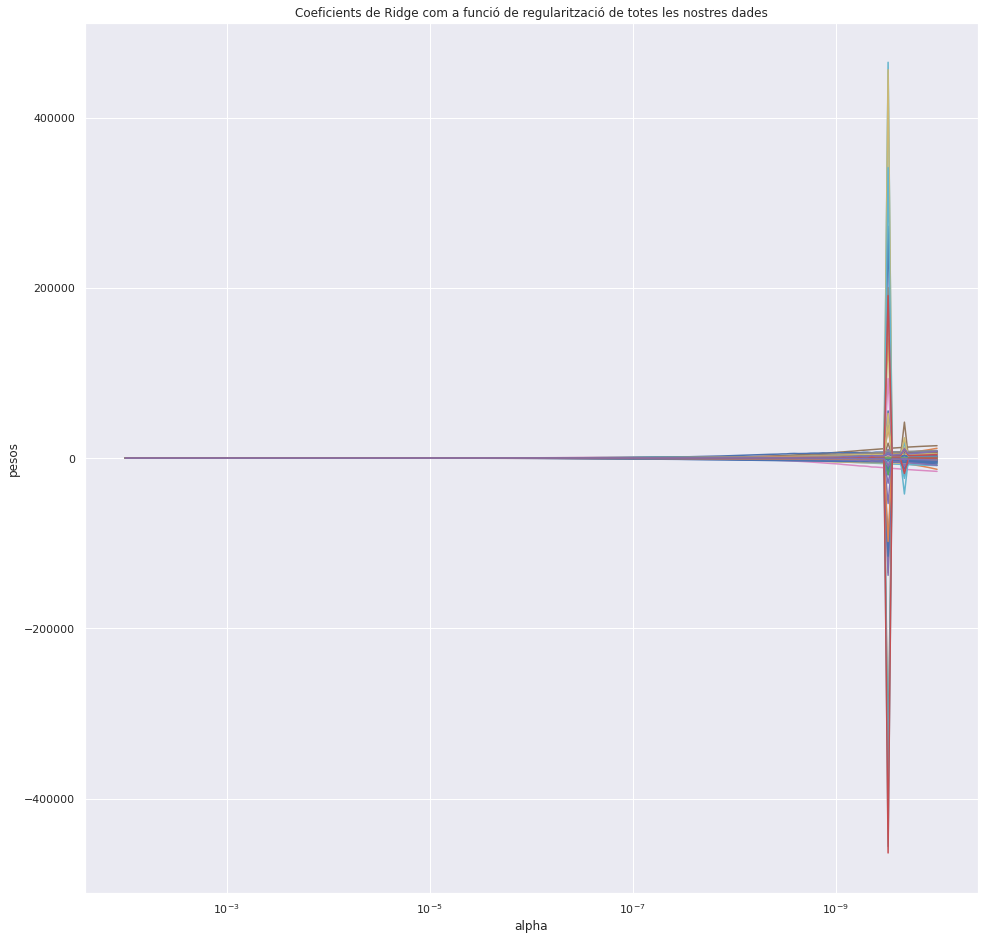

In [278]:
# #############################################################################
# Compute paths

n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X_train_p, y_train)
    coefs.append(ridge.coef_)

# #############################################################################
# Display results

f, ax = plt.subplots(figsize = (16,16))

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('pesos')
plt.title('Coeficients de Ridge com a funció de regularització de totes les nostres dades')
plt.axis('tight')
plt.show()

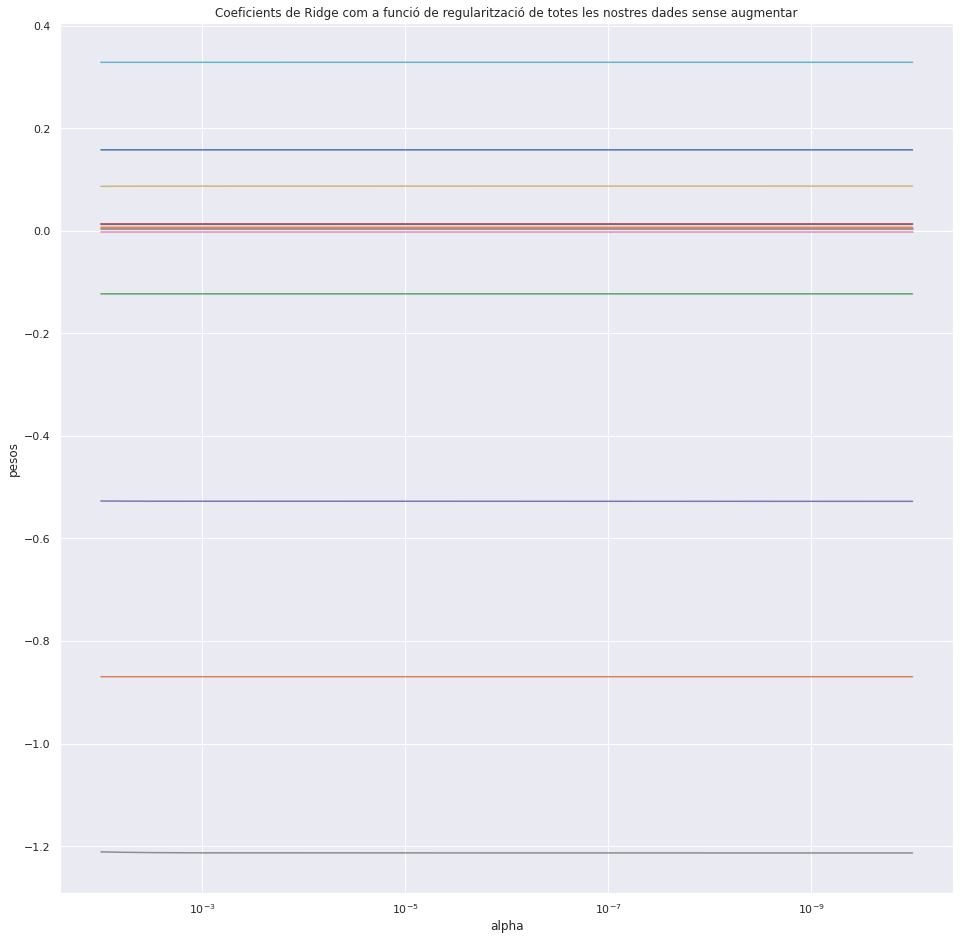

In [280]:
# #############################################################################
# Compute paths

n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)

# #############################################################################
# Display results

f, ax = plt.subplots(figsize = (16,16))

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('pesos')
plt.title('Coeficients de Ridge com a funció de regularització de totes les nostres dades sense augmentar')
plt.axis('tight')
plt.show()